# Decision Tress Cross Validation
    Classifier and Regressor

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_column', None)
pd.set_option('display.max_row', None)
pd.set_option('display.width', 100)

In [2]:
df = pd.read_csv(r'C:\Users\jayavaradhan.olivu\OneDrive - DISYS\Documents\Data Science\Data Science - Python\Python - Data Source\housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [4]:
imputer = SimpleImputer(strategy='mean')

imputer.fit_transform(df[['total_rooms']])

features = df.iloc[:, 0:8].columns

# for col in features:
#     plt.figure(figsize=(8, 5))
#     sns.scatterplot(x=col, y='median_house_value', data=df)
#     plt.show()

''' So based on this chart - this is not linear '''

' So based on this chart - this is not linear '

### Regressor

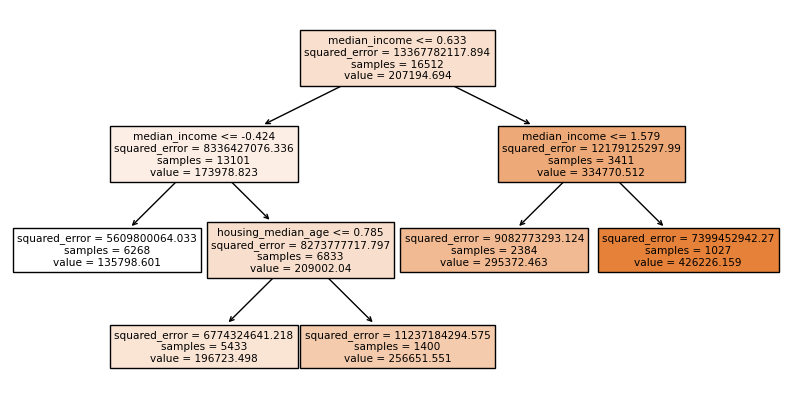

In [8]:
features = df.iloc[:, 0:8].columns
numerical_features = features 
x = df[features]
y_regressor = df['median_house_value']

x_train, x_test, y_train, y_test = train_test_split(x, y_regressor, test_size=0.2, random_state=42)

pipeline1 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

columns_transfer = ColumnTransformer(transformers=[('numerical_data', pipeline1, numerical_features)], remainder= 'passthrough')

pipeline2 = Pipeline(steps=[
    ('preprocessor', columns_transfer),
    ('Regressor', DecisionTreeRegressor(criterion='squared_error',max_depth=3, max_leaf_nodes=5, random_state=100))
])

pipeline2.fit(x_train, y_train)

y_pred_Regressor = pipeline2.predict(x_test)
Regressor_mse = mean_squared_error(y_pred_Regressor, y_test)
regressor_cross_validation = cross_validate(pipeline2,x, y_regressor, cv=5)
regressor_cross_validation

# plot_tree(pipeline2, feature_names=features) # Directly passing the pipeline2 in the plot_tree might not work, so need to access the set in pipelin

Regressor = pipeline2.named_steps['Regressor'] #accessing the step in the pipeline

plt.figure(figsize=(10,5))
plot_tree(Regressor,class_names=y_pred_Regressor  ,feature_names=features, filled=True)
plt.show()


### Classifier

C:\Users\jayavaradhan.olivu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jayavaradhan.olivu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jayavaradhan.olivu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_

              precision    recall  f1-score   support

   <1H OCEAN       0.74      0.86      0.79      1542
      INLAND       0.94      0.62      0.75      2005
      ISLAND       0.00      0.00      0.00         0
    NEAR BAY       0.97      0.73      0.83       581
  NEAR OCEAN       0.00      0.00      0.00         0

    accuracy                           0.73      4128
   macro avg       0.53      0.44      0.47      4128
weighted avg       0.87      0.73      0.78      4128

[[1325   77    1    0  139]
 [ 443 1247    0   14  301]
 [   0    0    0    0    0]
 [  27    0    0  422  132]
 [   0    0    0    0    0]]
{'fit_time': array([0.19623685, 0.20803714, 0.1498313 , 0.18384886, 0.18648267]), 'score_time': array([0.02361703, 0.01550937, 0.01541185, 0.02008724, 0.01908064]), 'test_score': array([0.66157946, 0.67999031, 0.6683624 , 0.45203488, 0.42926357])}


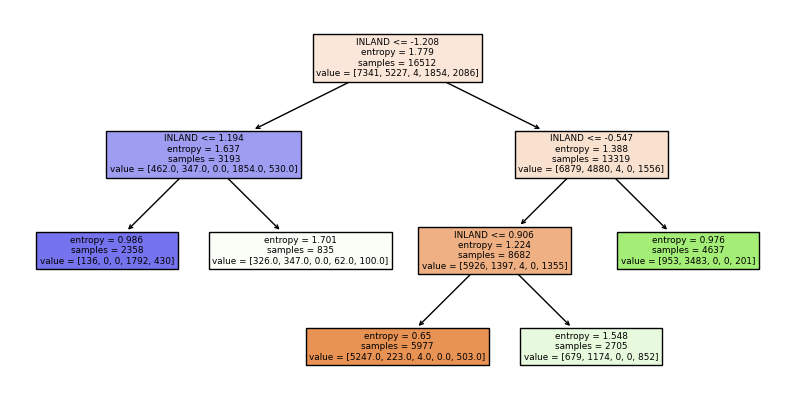

In [9]:
features = df.iloc[:, 0:9].columns
numerical_feature = features
categorical_feature = ['ocean_proximity']
x = df[features]
y_classifier = df[categorical_feature]

x_train, x_test, y_train, y_test = train_test_split(x, y_classifier, test_size=0.2, random_state=42)

pipeline1 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('Scaler', StandardScaler())
])

transfer = ColumnTransformer(transformers=[
    ('numerical_column', pipeline1, numerical_feature)
])

final_pipeline = Pipeline(steps=[
    ('Preprocessing', transfer),
    ('Model', DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=5, random_state=100))
])

final_pipeline.fit(x_train, y_train)

y_pred_classification = final_pipeline.predict(x_test)
classifier_accuracy = accuracy_score(y_pred_classification, y_test)
confusion_score = confusion_matrix(y_pred_classification, y_test)
classification_score = classification_report(y_pred_classification, y_test)
print(classification_score)
print(confusion_score)

## Cross-validation:

classification_cross_validation = cross_validate(final_pipeline, x, y_classifier, cv=5)
print(classification_cross_validation)

classifier = final_pipeline.named_steps['Model']

plt.figure(figsize=(10, 5))
plot_tree(classifier,feature_names=y_pred_classification, filled=True)
plt.show()